<img src="una.jpeg" style="width:850px;height:370px">

#  Twitter como mecanismo de violencia simbólica. 


In [1]:
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import string 
import nltk 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
                        
%matplotlib inline                    

In [2]:
# cargando los datasets
entrenamiento = pd.read_csv("train_E6oV3lV.csv")
prueba = pd.read_csv("test_tweets_anuFYb8.csv")


In [3]:
entrenamiento.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
prueba.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
entrenamiento[entrenamiento['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
entrenamiento[entrenamiento['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [7]:
entrenamiento.shape

(31962, 3)

In [8]:
entrenamiento["label"].value_counts() 

0    29720
1     2242
Name: label, dtype: int64

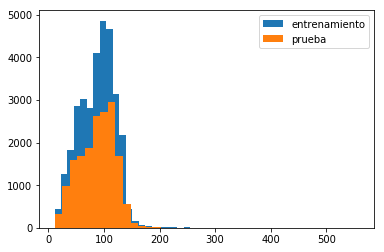

In [9]:
longitud_entrenamiento= entrenamiento['tweet'].str.len()  
longitud_prueba = prueba['tweet'].str.len()

plt.hist(longitud_entrenamiento, bins=40, label="entrenamiento") 
plt.hist(longitud_prueba, bins=40, label="prueba")
plt.legend()
plt.show()


## 1. Limpiando los Datos

In [59]:
combi = entrenamiento.append(prueba, ignore_index=True) 
print combi.shape


(49159, 3)


A continuación se muestra una función para eliminar el identificador de cada tweet.

In [11]:
def quitar_patron(tweet_txt, patron): 
    r = re.findall(patron, tweet_txt)  
    for i in r:
        tweet_txt = re.sub(i, '', tweet_txt) 
        
    return tweet_txt

### 1.1  Retirar el alias de Twitter (@user)

In [12]:
combi['tweet_ordenado'] = np.vectorize(quitar_patron)(combi['tweet'], "@[\w]*") 
combi.head(5)

,id,label,tweet,tweet_ordenado
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 1.2 Eliminación de puntuaciones, número y caracteres especiales.

In [13]:
combi['tweet_ordenado'] = combi['tweet_ordenado'].str.replace("[^a-zA-Z#]", " ") 
combi.head()

,id,label,tweet,tweet_ordenado
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


### 1.3 Eliminando palabras cortas.

In [14]:
combi['tweet_ordenado'] = combi['tweet_ordenado'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
combi['tweet_ordenado'].head()

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cause they offer wheelchai...
2                                  bihday your majesty
3                           #model love take with time
4                       factsguide society #motivation
Name: tweet_ordenado, dtype: object

### 1.4 Normalización del texto.


La función PorterStemmer() de nltk normaliza los tweets. ya habiendo toquenizado previamente. Los tokens son términos o palabras individuales, y la tokenización es el proceso de dividir una cadena de texto en tokens.

In [16]:
tokenizar_tweet = combi['tweet_ordenado'].apply(lambda x: x.split())

In [17]:
print tokenizar_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
5        [huge, fare, talking, before, they, leave, cha...
6                               [camping, tomorrow, danny]
7        [next, school, year, year, exams, think, about...
8        [love, land, #allin, #cavs, #champions, #cleve...
9                                          [welcome, here]
10       [#ireland, consumer, price, index, climbed, fr...
11       [selfish, #orlando, #standwithorlando, #pulses...
12                       [daddy, today, days, #gettingfed]
13       [#cnn, calls, #michigan, middle, school, build...
14       [comment, #australia, #opkillingbay, #seasheph...
15       [ouch, junior, angry, #got, #junior, #yugyoem,...
16         [thankful, having, paner, #thankful, #positiv

Ahora si podemos normalizar los tweets toquenizados.

In [18]:
from nltk.stem.porter import * 
stemmer = PorterStemmer()        

tokenizar_tweet = tokenizar_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenizar_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweet_ordenado, dtype: object


Ahora vamos a unir estos tokens de nuevo juntos.

In [19]:
for i in range(len(tokenizar_tweet)):   
    tokenizar_tweet[i] = ' '.join(tokenizar_tweet[i])
    
combi['tweet_ordenado'] = tokenizar_tweet
combi.head()

,id,label,tweet,tweet_ordenado
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Visualización a partir de tweets con WordfCloud.

#### 2.1 Palabras mas usadas visualizadas por la libreria WordfCLoud.

Lo que nos permite esta librería es una visualizacion por medio de una imagen las palabras mas frecuentes del dataset, mediante el trazado de wordfcloud.

Una nube de palabras es una visualización en la que las palabras más frecuentes aparecen en tamaño grande y las palabras menos frecuentes aparecen en tamaños más pequeños.


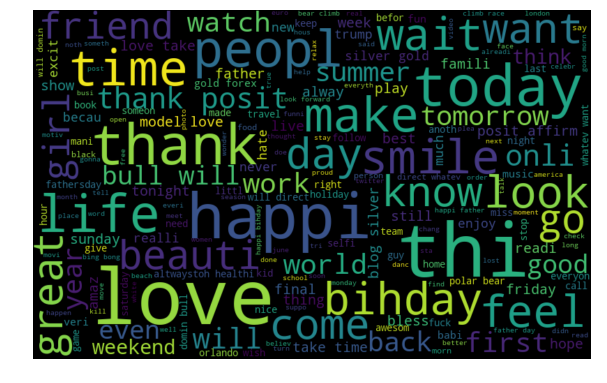

In [20]:
todas = ' '.join([texto for texto in combi['tweet_ordenado']])
from wordcloud import WordCloud
img = WordCloud(width=800, height=500, random_state=25, max_font_size=110).generate(todas)

plt.figure(figsize=(10, 7))
plt.imshow(img, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 2.2  Palabras en tweets no racistas - sexistas.

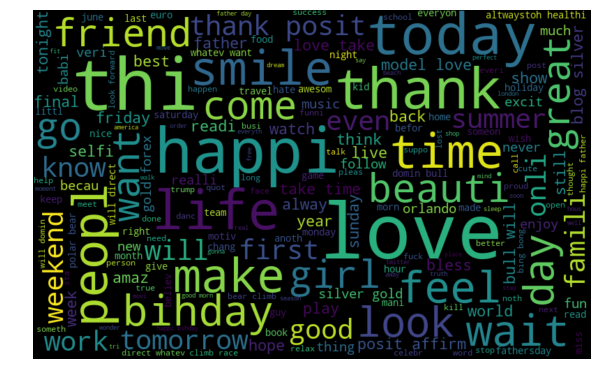

In [21]:
palabras_normales =' '.join([texto for texto in combi['tweet_ordenado'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(palabras_normales)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 2.3 Tweets racistas / sexistas

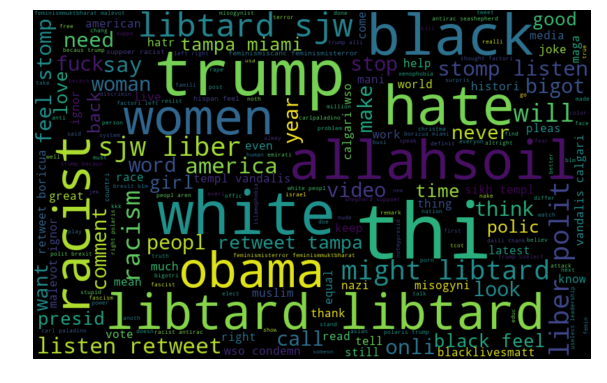

In [22]:
palabras_negativas = ' '.join([texto for texto in combi['tweet_ordenado'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(palabras_negativas)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 2.4  Entender el impacto de Hashtags en el sentimiento de los tweets

In [23]:
def extraer_hashtag(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)   

    return hashtags

In [24]:
# extraer hashtags de tweets no racistas / sexistas.

HT_normal = extraer_hashtag(combi['tweet_ordenado'][combi['label'] == 0])

# extrayendo hashtags de tweets racistas / sexistas

HT_negativo = extraer_hashtag(combi['tweet_ordenado'][combi['label'] == 1])

HT_normal = sum(HT_normal,[]) 
HT_negativo = sum(HT_negativo,[])

In [25]:
#print HT_normal


#### Tweets no racistas / sexistas

Primero revisaremos los hashtag en los tweets no racistas / sexistas.

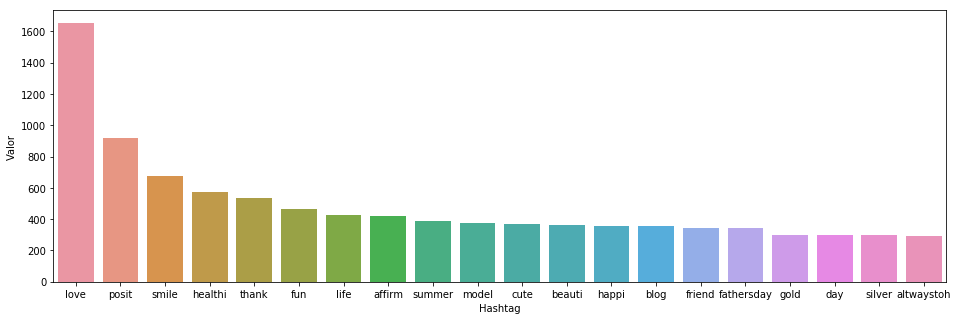

In [26]:
a = nltk.FreqDist(HT_normal) #FreqDist funcion de nltk que me devuelve la frecuencia de palabras en un texto.
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Valor': list(a.values())})

# Seleccionando los 20 hashtags más frecuentes.    
d = d.nlargest(columns="Valor", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Valor")
ax.set(ylabel = 'Valor')
plt.show()

In [27]:
print d

          Hashtag  Valor
1350         love   1654
16396       posit    917
2447        smile    676
16004     healthi    573
11294       thank    534
13032         fun    463
805          life    425
10557      affirm    423
2113       summer    390
16791       model    375
11270        cute    367
268        beauti    365
1070        happi    358
16823        blog    356
6561       friend    343
7570   fathersday    341
3044         gold    301
13801         day    301
341        silver    300
15679  altwaystoh    295


In [28]:
#print a.keys()

Todos estos hashtags son positivos y tiene sentido.

#### Tweets racistas / sexistas


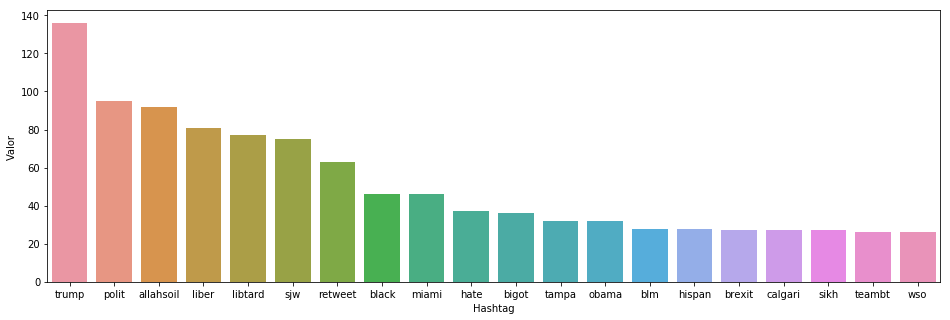

In [29]:
b = nltk.FreqDist(HT_negativo)    
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Valor': list(b.values())})

# Seleccionando los 20 hashtags más frecuentes.  
e = e.nlargest(columns="Valor", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Valor")

## Extraer características de los tweets.

Para analizar un dato preprocesado, es necesario convertirlo en características. Dependiendo del uso, las características del texto se pueden construir utilizando técnicas variadas: Bolsa de palabras, TF-IDF y incrustaciones de palabras.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim   

### Características de la Bolsa de palabras.
Método que se utiliza en el procesado del lenguaje para representar documentos ignorando el orden de las palabras.

In [31]:
combi['tweet_ordenado'].head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: tweet_ordenado, dtype: object

In [32]:
repetir = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')  #muesta la frecuencia de palabras en una matriz. donde las filas son el numero total de tweets, y todas las palabras va hacer las columnas
vectorizacion = repetir.fit_transform(combi['tweet_ordenado']) 
#print(repetir.vocabulary_)
print vectorizacion
#repetir.get_feature_names()

  (0, 738)	1
  (0, 463)	1
  (0, 302)	1
  (1, 600)	1
  (1, 131)	1
  (1, 879)	1
  (2, 79)	1
  (3, 888)	1
  (3, 518)	1
  (3, 557)	1
  (4, 566)	1
  (5, 485)	1
  (5, 69)	1
  (5, 858)	1
  (5, 423)	1
  (6, 894)	1
  (6, 121)	1
  (7, 353)	1
  (7, 432)	1
  (7, 393)	1
  (7, 883)	1
  (7, 283)	2
  (7, 992)	2
  (7, 749)	2
  (8, 132)	1
  :	:
  (49154, 728)	1
  (49155, 246)	1
  (49155, 961)	1
  (49155, 307)	1
  (49155, 498)	1
  (49156, 122)	1
  (49156, 411)	1
  (49156, 929)	1
  (49156, 980)	2
  (49156, 605)	1
  (49156, 498)	1
  (49156, 891)	1
  (49157, 612)	1
  (49157, 226)	1
  (49157, 198)	1
  (49157, 480)	1
  (49157, 553)	2
  (49157, 728)	1
  (49157, 175)	1
  (49157, 981)	2
  (49157, 389)	1
  (49158, 356)	1
  (49158, 243)	1
  (49158, 799)	1
  (49158, 333)	1


### Características de TF-IDF

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tweet_ordenado'])
print tfidf

  (0, 302)	0.46871135687055143
  (0, 463)	0.5896490179849546
  (0, 738)	0.6577413621857342
  (1, 879)	0.3938403468675415
  (1, 131)	0.6145629375807904
  (1, 600)	0.6835218920644196
  (2, 79)	1.0
  (3, 557)	0.7040384885805177
  (3, 518)	0.44016705593507854
  (3, 888)	0.5572995329862621
  (4, 566)	1.0
  (5, 423)	0.586120951905663
  (5, 858)	0.4743403266916206
  (5, 69)	0.4637175931713698
  (5, 485)	0.4652198168550412
  (6, 121)	0.809676118019697
  (6, 894)	0.5868769751051355
  (7, 749)	0.47546741144240784
  (7, 992)	0.40382612331421974
  (7, 283)	0.6221668428341786
  (7, 883)	0.20713435439054187
  (7, 393)	0.22953868678391207
  (7, 432)	0.298367397816037
  (7, 353)	0.19785820398515808
  (8, 518)	0.2913310184015602
  :	:
  (49154, 87)	0.42669972987029553
  (49155, 498)	0.38062516605968433
  (49155, 307)	0.412937926376108
  (49155, 961)	0.532509130693973
  (49155, 246)	0.6332778044821932
  (49156, 891)	0.2234444840195207
  (49156, 498)	0.22464038972727007
  (49156, 605)	0.36246533968129546

### Incrustaciones de palabras


#### Incrustaciones Word2Vec 
Word2vec es un grupo de modelos relacionados que se utilizan para producir incrustaciones de palabras, Word2vec toma como entrada un gran corpus de texto y produce un espacio vectorial, típicamente de varios cientos de dimensiones, a cada palabra única en el corpus se le asigna un vector correspondiente en el espacio.

In [34]:
tokenized_tweet = combi['tweet_ordenado'].apply(lambda x: x.split()) # tokenizacion.

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, 
            window=5, 
            min_count=2,
            sg = 1, 
            hs = 0,
            negative = 10,
            workers= 2, 
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tweet_ordenado']), epochs=20)

(6510028, 7536020)

Juguemos un poco con nuestro modelo de Word2Vec y veamos cómo funciona. Especificaremos una palabra y el modelo extraerá las palabras más similares del corpus.

In [35]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5658787488937378),
 (u'#cellar', 0.5551610589027405),
 (u'cookout', 0.5551244020462036),
 (u'#foodcoma', 0.5550904273986816),
 (u'melani', 0.5525111556053162),
 (u'#avocado', 0.548076331615448),
 (u'#biall', 0.5456784963607788),
 (u'aladdin', 0.5421183109283447),
 (u'dess', 0.5419977307319641),
 (u'fav', 0.5397219657897949)]

In [36]:
model_w2v.wv.most_similar(positive="trump")

[(u'donald', 0.5549226999282837),
 (u'hillari', 0.5462592840194702),
 (u'phoni', 0.5314802527427673),
 (u'potu', 0.5255356431007385),
 (u'#delegaterevolt', 0.5252672433853149),
 (u'unfavor', 0.5235130786895752),
 ('unfit', 0.5182930827140808),
 (u'jibe', 0.5182414650917053),
 (u'melo', 0.5152491331100464),
 (u'endors', 0.5086897611618042)]

In [37]:
model_w2v['food']

array([-3.07309598e-01, -9.83177274e-02,  4.07483965e-01, -3.01135689e-01,
       -4.60886359e-02, -2.70088673e-01,  4.60334331e-01,  8.07140708e-01,
        5.03889918e-01, -3.97221982e-01,  8.69971812e-01,  4.97953653e-01,
       -5.95530355e-03, -2.07959846e-01,  7.99424201e-02,  5.18195391e-01,
        1.13328137e-01, -7.74019361e-02, -4.17733490e-02, -8.64435807e-02,
       -3.76471728e-01,  4.89882052e-01, -1.87119797e-01,  8.22674558e-02,
       -1.21912226e-01,  2.46034771e-01, -1.11912288e-01, -5.46394348e-01,
       -8.24465215e-01, -4.86955464e-01,  2.69732773e-01,  8.49129021e-01,
        3.70686322e-01,  3.73535961e-01,  3.67685854e-01,  5.92620015e-01,
       -3.83930504e-01, -3.06175530e-01, -3.57675672e-01, -2.11206540e-01,
        8.08832467e-01, -4.86249298e-01, -2.23346680e-01,  2.72263765e-01,
        4.69502270e-01, -2.24378198e-01, -3.20629090e-01,  4.45756674e-01,
       -4.48206246e-01, -3.83216172e-01, -9.52501595e-01, -5.43676317e-01,
        7.18166769e-01,  

In [38]:
len(model_w2v['food']) #The length of the vector is 200

200

#### Preparando Vectores para Tweets

Utilizaremos la siguiente función para crear un vector para cada tweet, tomando el promedio de los vectores de las palabras presentes en el tweet.

In [39]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [40]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
print wordvec_df

            0         1         2         3         4         5         6    \
0     -0.050394  0.268277  0.127744 -0.367926 -0.390671  0.295341  0.267453   
1     -0.244855  0.089498  0.257844 -0.211072 -0.245395  0.180061  0.109764   
2     -0.033003  0.266391 -0.145509 -0.071290 -0.353979  0.324247 -0.048960   
3     -0.243330 -0.255408  0.147763 -0.393517 -0.259980  0.416220  0.308694   
4     -0.353505  0.194377 -0.049492 -0.137407 -0.079556  0.582499  0.321818   
5     -0.187585  0.116293  0.112962 -0.286068 -0.213378  0.207807  0.128850   
6     -0.073843 -0.207672 -0.323449  0.000691 -0.210264  0.392215 -0.149236   
7     -0.339960 -0.050300 -0.013992 -0.139884 -0.412108  0.337217 -0.060949   
8     -0.103448  0.123943  0.111824 -0.506136 -0.188968  0.097826  0.156364   
9      0.128867 -0.087488 -0.180269  0.477878 -0.743779  0.766631 -0.327563   
10     0.365676 -0.295433 -0.044172 -0.187354 -0.225235  0.168240  0.064181   
11    -0.238454  0.074320  0.067956 -0.371152 -0.367

Ahora tenemos 200 funciones nuevas, mientras que en Bag of Words y TF-IDF teníamos 1000 funciones.

## Construcción del modelo.
Ahora hemos terminado con todas las etapas de modelado previo necesarias para obtener los datos en la forma y forma adecuadas. Construiremos modelos en los conjuntos de datos con diferentes conjuntos de características preparados en las secciones anteriores: Bolsa de palabras, TF-IDF, vectores word2vec. Usaremos los siguientes algoritmos para construir modelos:


###  Logistic Regression.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Caracteristicas de conjunto de palabras.

In [42]:
entrenamiento_vec = vectorizacion[:31962,:] 
prueba_vec = vectorizacion[31962:,:]

# División de datos en conjunto de entrenamiento y validación.
xtrain, xvalid, ytrain, yvalid = train_test_split(entrenamiento_vec, entrenamiento['label'],  
                                                          random_state=42, 
                                                          test_size=0.1)

In [43]:
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) 

prediccion = lreg.predict_proba(xvalid) 
prediccion_int = prediccion[:,1] >= 0.3 
prediccion_int = prediccion_int.astype(np.int)

f1_score(yvalid, prediccion_int) 

0.5803108808290155

Ahora vamos a hacer predicciones para el conjunto de datos de prueba y crear un archivo de envío.

In [44]:
test_pred = lreg.predict_proba(prueba_vec)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
prueba['label'] = test_pred_int
resultado = prueba[['id','label']]
resultado.to_csv('sub_lreg_bow.csv', index=False) 

#### Caracteristicas TF-IDF 

In [45]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [46]:
lreg.fit(xtrain_tfidf, ytrain)

prediccion = lreg.predict_proba(xvalid_tfidf)
prediccion_int = prediccion[:,1] >= 0.3
prediccion_int = prediccion_int.astype(np.int)

f1_score(yvalid, prediccion_int)

0.5714285714285714

### Support Vector Machine

In [47]:
from sklearn import svm

#### Caracteristicas de conjunto de palabras.

In [48]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain, ytrain)

prediccion = svc.predict_proba(xvalid)
prediccion_int = prediccion[:,1] >= 0.3
prediccion_int = prediccion_int.astype(np.int)
f1_score(yvalid, prediccion_int)

0.5360230547550432

Hagamos predicciones para el conjunto de datos de prueba y creamos otro archivo de envío.

In [49]:
test_pred = svc.predict_proba(prueba_vec)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
prueba['label'] = test_pred_int
resultado = prueba[['id','label']]
resultado.to_csv('sub_svc_bow.csv', index=False)

Puntuación: 0.554

En este caso, tanto el puntaje de validación como el puntaje de la tabla de clasificación son ligeramente menores que los puntajes de Regresión logística para las características de bolsa de palabras.

####  Caracteristicas de TF-IDF

In [50]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediccion = svc.predict_proba(xvalid_tfidf)
prediccion_int = prediccion[:,1] >= 0.3
prediccion_int = prediccion_int.astype(np.int)
f1_score(yvalid, prediccion_int)

0.5302593659942363

### RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier

#### Caracteristicas de conjunto de palabras

In [52]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain, ytrain)

prediccion = rf.predict(xvalid)

print f1_score(yvalid, prediccion)

0.5885286783042394


verificamos predicciones para el conjunto de datos de prueba y creamos otro archivo de salida.

In [53]:
test_pred = rf.predict(prueba_vec)
prueba['label'] = test_pred
resultado = prueba[['id','label']]
resultado.to_csv('sub_rf_bow.csv', index=False)

#### Caracteristicas de TF-IDF

In [54]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediccion = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediccion)

0.5705882352941176

 ### XGBoost

In [55]:
from xgboost import XGBClassifier

#### Caracteristicas de conjunto de palabras

In [ ]:
_proba(xvalid_tfidf)
prediccion_int = prediccion[:,1] >= 0.3
prediccion_int = prediccion_int.astype(np.int)
f1_score(yvalid, prediccion_int)

In [56]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain, ytrain)
prediccion = xgb_model.predict(xvalid)
f1_score(yvalid, prediccion)

0.5141065830721003

In [58]:
test_pred = xgb_model.predict(prueba_vec)
prueba['label'] = test_pred
resultado = prueba[['id','label']]
resultado.to_csv('sub_xgb_bow.csv', index=False)

#### Caracteristicas de TF-IDF

In [141]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediccion = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediccion)

0.5185891325071497